# SARIMAX Model Analysis of Apple Stock with Exogenous Variables

## Introduction to Exogenous Variables in Time Series Models

Exogenous variables, also known as external regressors, are independent variables that are not part of the main time series but can influence it. In the context of stock price prediction, exogenous variables might include:

1. Market indices (e.g., S&P 500)
2. Economic indicators (e.g., GDP growth, unemployment rate)
3. Company-specific metrics (e.g., revenue, earnings per share)
4. Sentiment indicators (e.g., social media sentiment)

## Mathematical Formulation of SARIMAX

The SARIMAX model extends the SARIMA model by including exogenous variables. The mathematical representation is:

$$ φ(B)Φ(Bᵐ)(1-B)ᵈ(1-Bᵐ)D (Yₜ - β₁X₁,ₜ - β₂X₂,ₜ - ... - βₖXₖ,ₜ) = θ(B)Θ(Bᵐ)εₜ$$

Where:
- $Yₜ$ is the dependent variable (in our case, Apple stock price)
- $X₁,ₜ, X₂,ₜ, ..., Xₖ,$ₜ are the exogenous variables
- $β₁, β₂, ..., βₖ$ are the coefficients of the exogenous variables
- All other terms are as defined in the SARIMA model

## Implementing SARIMAX for Apple Stock

Let's implement a SARIMAX model for Apple stock, using the S&P 500 index as an exogenous variable:




In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Download Apple stock data and S&P 500 data
start_date = "2021-01-01"
end_date = "2024-06-24"
aapl = yf.download("AAPL", start=start_date, end=end_date)['Close']
sp500 = yf.download("^GSPC", start=start_date, end=end_date)['Close']

# Align the data and remove any missing values
data = pd.concat([aapl, sp500], axis=1).dropna()
data.columns = ['AAPL', 'SP500']

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
test_size = len(test)

# Determine the best SARIMAX model
exog = train['SP500']
endog = train['AAPL']

model = auto_arima(endog, exogenous=exog, seasonal=True, m=12,
                   start_p=1, start_q=1, start_P=1, start_Q=1,
                   max_p=3, max_q=3, max_P=2, max_Q=2, d=1, D=1,
                   trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, out_of_sample=200)

print(model.summary())

# Fit the SARIMAX model
sarimax_model = SARIMAX(endog, exog=exog, order=model.order, seasonal_order=model.seasonal_order)
results = sarimax_model.fit()

print(results.summary())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3802.747, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3597.813, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3804.105, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3525.586, Time=0.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.89 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.08 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3523.686, Time=0.29 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3596.070, Time=0.12 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.68 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=3525.569, Time=0.42 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3526.799, Time=0.73 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=3525.6

c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               AAPL   No. Observations:                  697
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1385.522
Date:                            Sun, 07 Jul 2024   AIC                           2779.044
Time:                                    00:23:31   BIC                           2797.156
Sample:                                         0   HQIC                          2786.053
                                            - 697                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SP500          0.0475      0.001     37.409      0.000       0.045       0.050
ar.S.L12      -0.6961      0.027   

c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


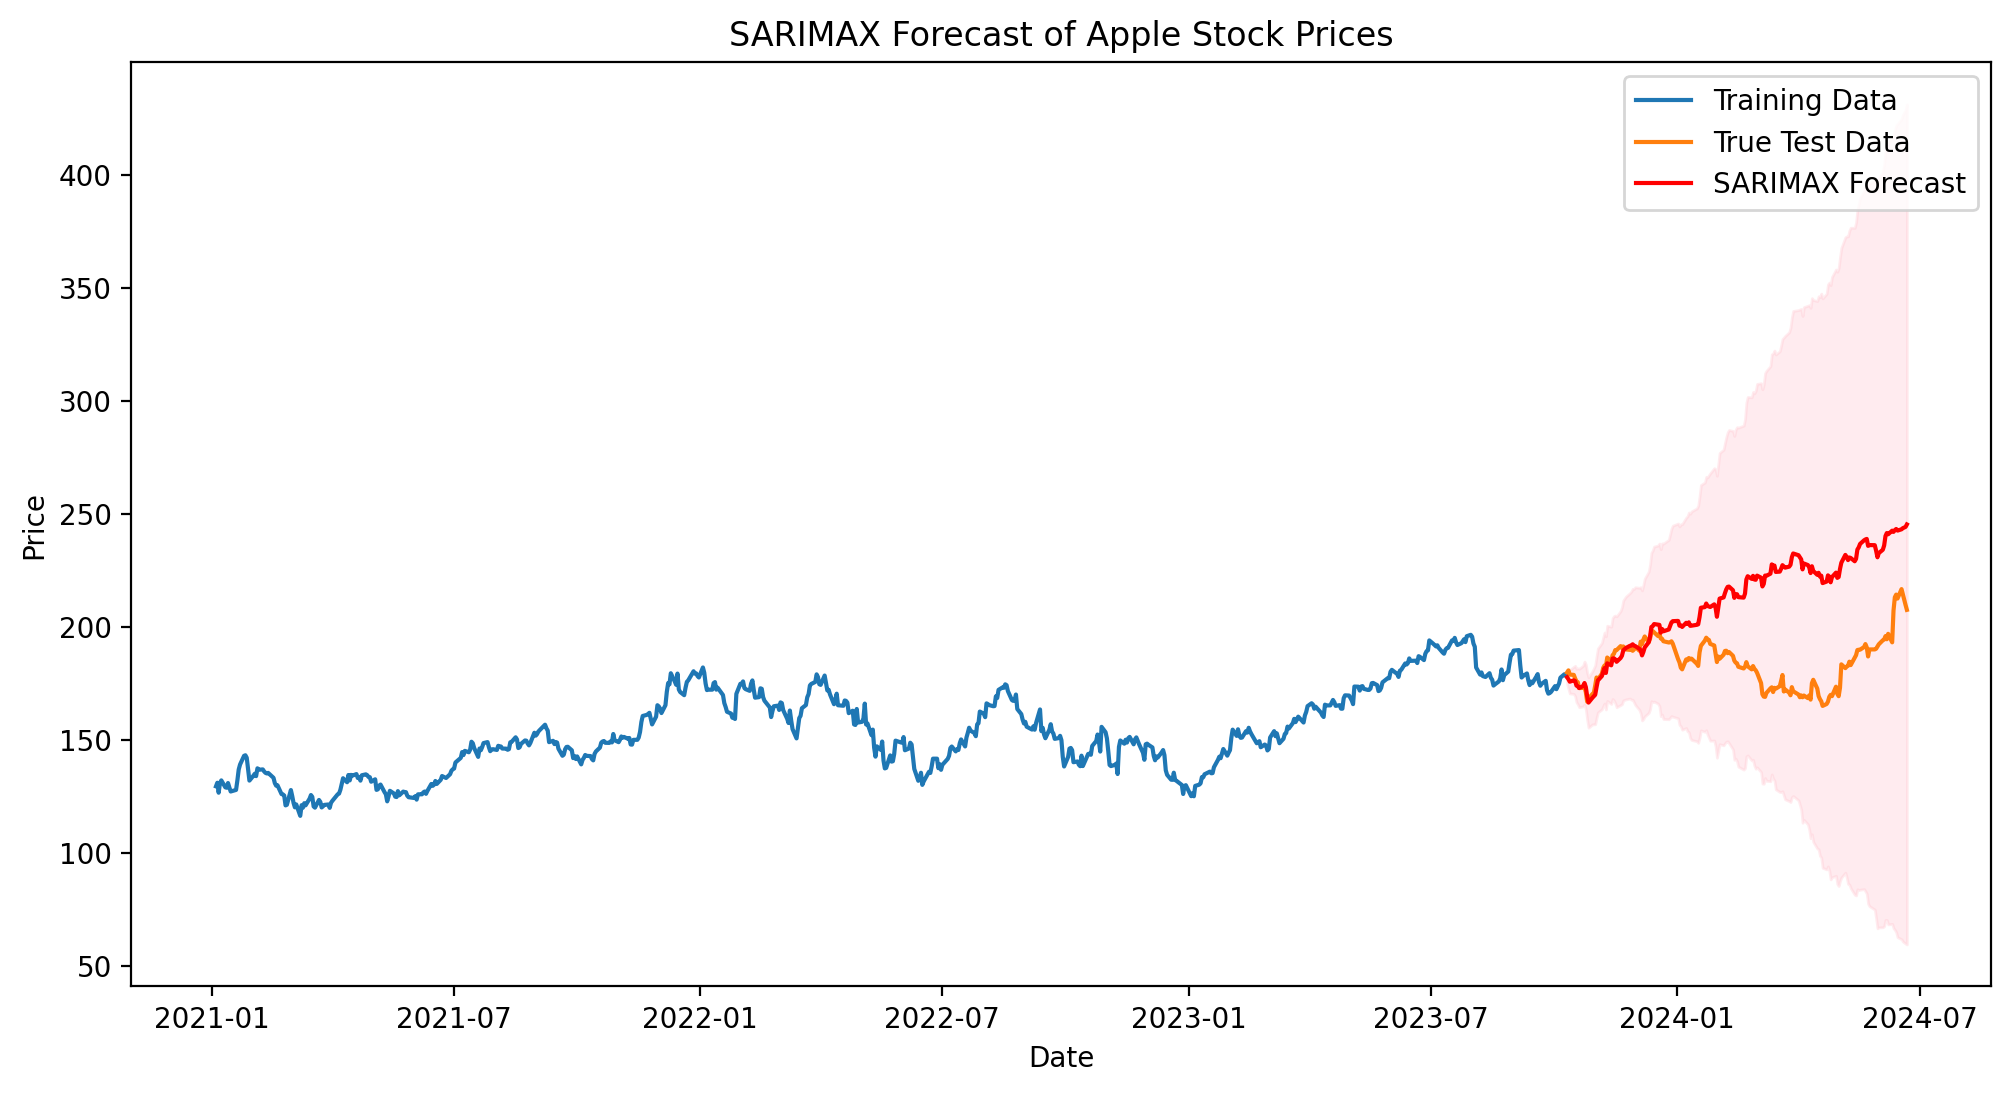

Mean Squared Error: 1235.4975
Mean Absolute Error: 28.1924
Root Mean Squared Error: 35.1496
                                     SARIMAX Results                                      
Dep. Variable:                               AAPL   No. Observations:                  697
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1385.522
Date:                            Sun, 07 Jul 2024   AIC                           2779.044
Time:                                    00:23:31   BIC                           2797.156
Sample:                                         0   HQIC                          2786.053
                                            - 697                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SP500          0.0475 

In [66]:
# Forecast
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps, exog=test['SP500'])
forecast_ci = forecast.conf_int(alpha=0.1)

# Plot the forecast
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(train.index, train['AAPL'], label='Training Data')
plt.plot(test.index, test['AAPL'], label='True Test Data')
plt.plot(test.index, forecast.predicted_mean, color='r', label='SARIMAX Forecast')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMAX Forecast of Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test['AAPL'], forecast.predicted_mean)
mae = mean_absolute_error(test['AAPL'], forecast.predicted_mean)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

# Check the impact of the exogenous variable
print(results.summary())

This model provide a good forecast for the first 20 candles, then it loses accuracy incrementally after that period (as the confidence levels diverges). A solution could be to retrain the model each month or some other arbitrary period. In the next section, we will see how to perform that in a simple way.

## Update Model each month

In [71]:
predictions = []
conf_inters = []
step = 20  # one month has 20 tradable days


for i in range(0, test_size, step):
    # Split the data into train and test sets
    train_size = int(len(data) * 0.8) + i
    train, test = data[:train_size], data[train_size:train_size+step]

    # Determine the best SARIMAX model
    exog = train['SP500']
    endog = train['AAPL']

    # Fit the SARIMAX model
    sarimax_model = SARIMAX(endog, exog=exog, order=model.order, seasonal_order=model.seasonal_order)
    results = sarimax_model.fit()
    
    # Forecast
    forecast_steps = len(test)
    forecast = results.get_forecast(steps=forecast_steps, exog=test['SP500'])
    forecast_ci = forecast.conf_int()

    predictions.append(forecast.predicted_mean)
    conf_inters.append(forecast_ci)

    # print(i, forecast_steps) 


c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\stefa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predict

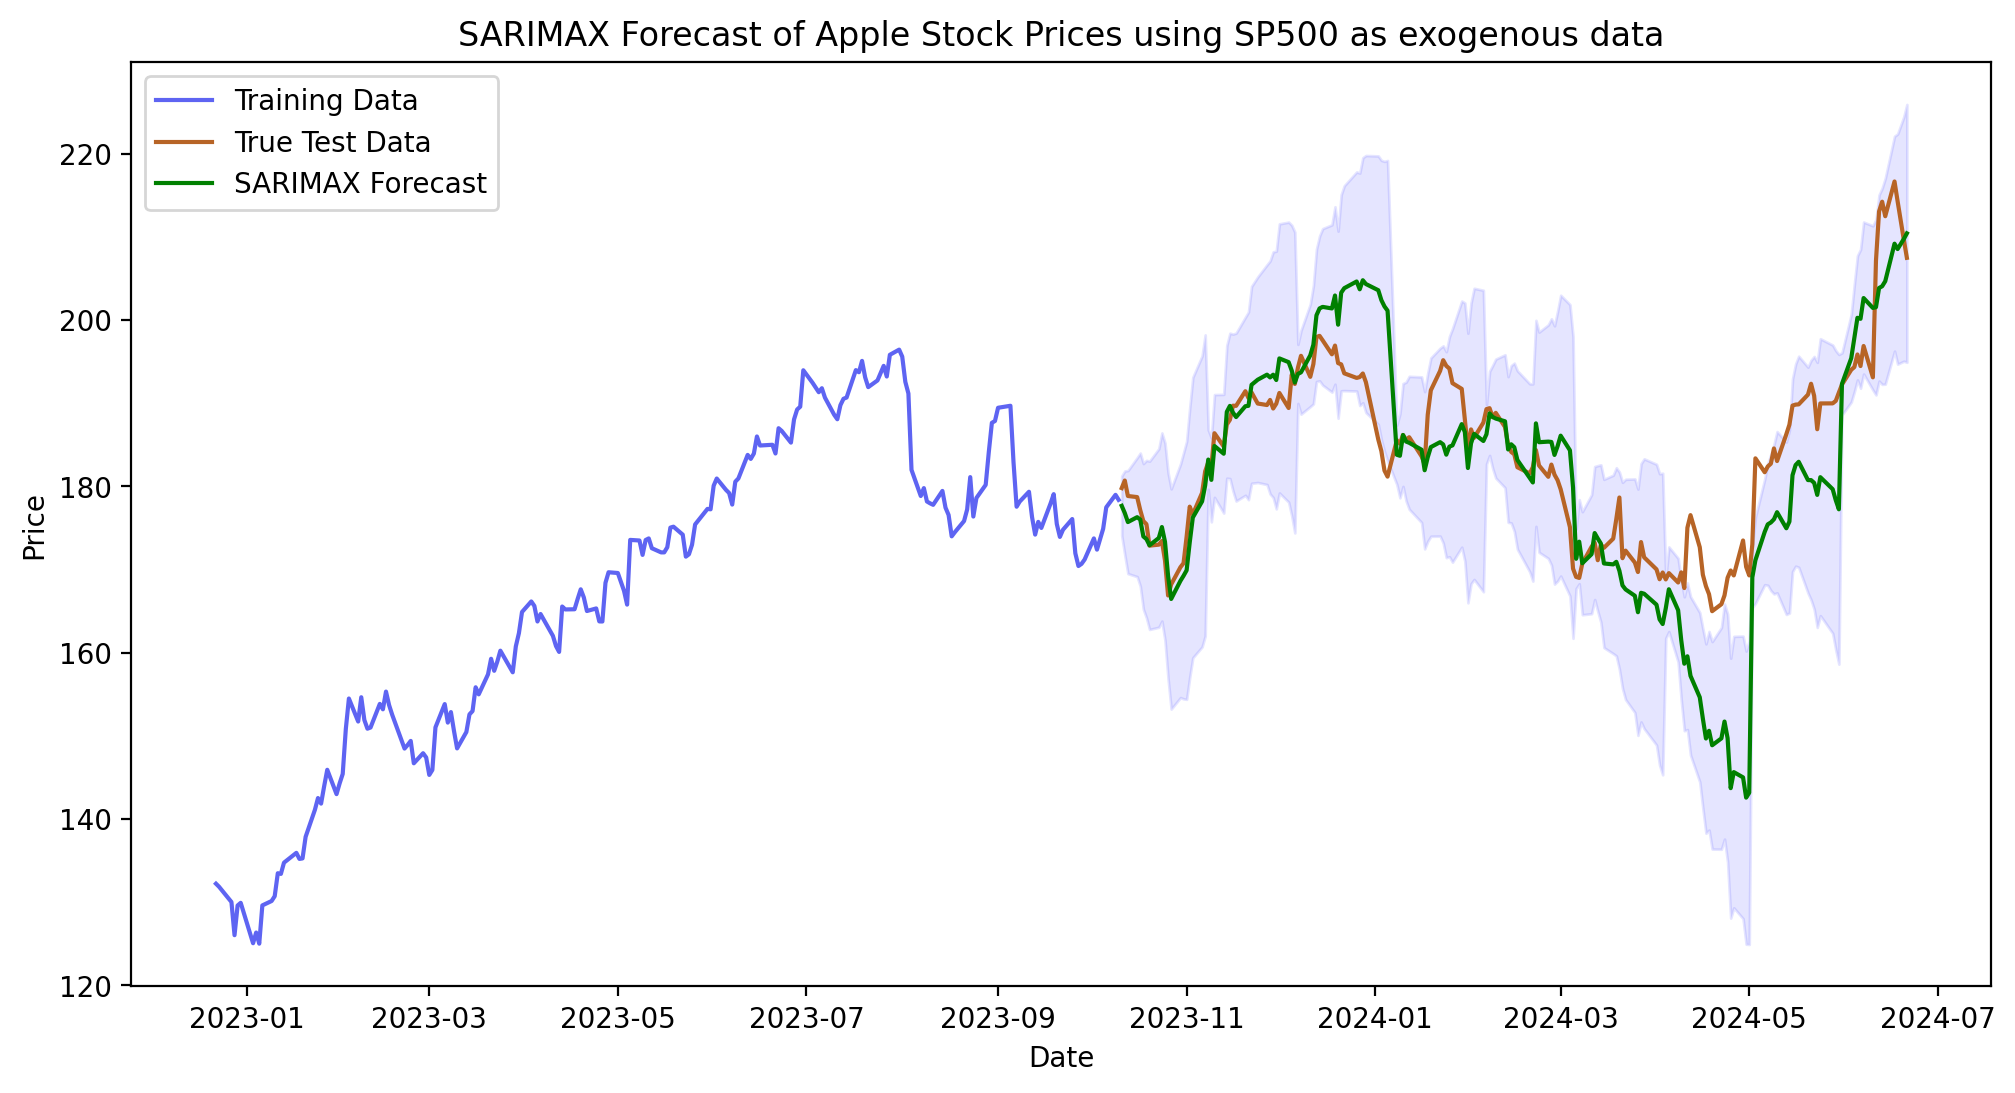

Mean Squared Error: 72.5482
Mean Absolute Error: 5.9930
Root Mean Squared Error: 8.5175


In [78]:
# Concatenate predictions list
forecasts = pd.concat(predictions)
forecasts_ci = pd.concat(conf_inters)

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
test_size = len(test)

# Plot the forecast
plt.figure(figsize=(12, 6), dpi=200)
plt.plot(train.index[-200:], train['AAPL'].iloc[-200:], label='Training Data', color="#5e64f2")
plt.plot(test.index, test['AAPL'], label='True Test Data', color="#b76426")
plt.plot(test.index, forecasts, color='g', label='SARIMAX Forecast')
plt.fill_between(test.index, forecasts_ci.iloc[:, 0], forecasts_ci.iloc[:, 1], color='blue', alpha=0.1)
plt.title('SARIMAX Forecast of Apple Stock Prices using SP500 as exogenous data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test['AAPL'], forecasts)
mae = mean_absolute_error(test['AAPL'], forecasts)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')


## Interpreting the Results

When interpreting the SARIMAX model results, pay attention to:

1. The coefficient and p-value of the exogenous variable (S&P 500 in this case). A low p-value indicates that the S&P 500 is a significant predictor of Apple's stock price.

2. The AIC (Akaike Information Criterion) of the SARIMAX model compared to the SARIMA model without exogenous variables. A lower AIC suggests a better model fit.

3. The forecast accuracy metrics (MSE, MAE, RMSE) compared to the model without exogenous variables.

As expected from the "*update*" method, the MAE is much lower (6 against 28 of the previous one). In particular a 1-year forecast is a too far prediction for the model. Hence updating the model (retraining) each month can lead to much better results.

## Advantages of Including Exogenous Variables

1. **Improved Accuracy**: Exogenous variables can capture external influences on the stock price, potentially leading to more accurate predictions.

2. **Better Understanding of Relationships**: The model provides insights into how external factors affect the stock price.

3. **Flexibility**: You can include multiple exogenous variables to capture different aspects of the market or economy.

## Limitations and Considerations

1. **Data Availability**: Ensuring that you have future values of exogenous variables for forecasting can be challenging.

2. **Overfitting Risk**: Including too many exogenous variables can lead to overfitting.

3. **Assumption of Linear Relationships**: SARIMAX assumes linear relationships between the exogenous variables and the target variable.

4. **Stationarity**: Exogenous variables should ideally be stationary or differenced to achieve stationarity.

## Conclusion

Incorporating exogenous variables through a SARIMAX model can significantly enhance our ability to forecast Apple stock prices. By including relevant external factors like the S&P 500 index, we can capture broader market trends that influence individual stock performance.

However, it's crucial to carefully select exogenous variables based on domain knowledge and to rigorously test their impact on model performance. Always validate your model using out-of-sample data and consider combining statistical forecasts with fundamental analysis for a comprehensive investment strategy.